<a href="https://colab.research.google.com/github/9-coding/Machine_Learning/blob/main/k_means_k_medoids_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week3 Homework :
### Check the difference between k-means and pam(k-medoids) when outlier is present (visualization)


As shown in the plot, k-means and pam generally cluster similarly, but show distinct differences in the position of centroid.
When Outlier occurs, k-means classifies outlier into one cluster, making it a cluster with only one centroid in it. However, the PAM can see the inclusion of outliers in the original cluster.



In [6]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00


K-Means / k = 3 
centroids:
[[55.1        46.1       ]
 [29.6        66.8       ]
 [39.27272727 15.18181818]]


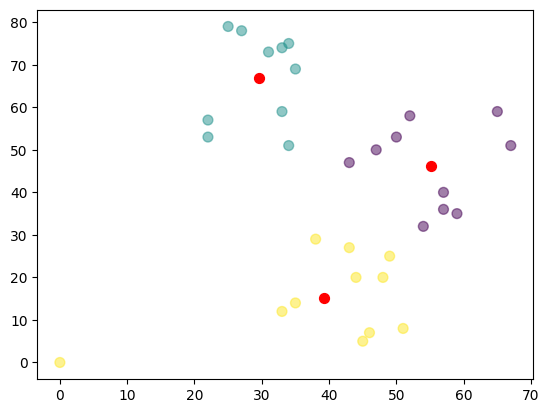




PAM / k = 3 
centroids:
[[44. 20.]
 [50. 53.]
 [31. 73.]]


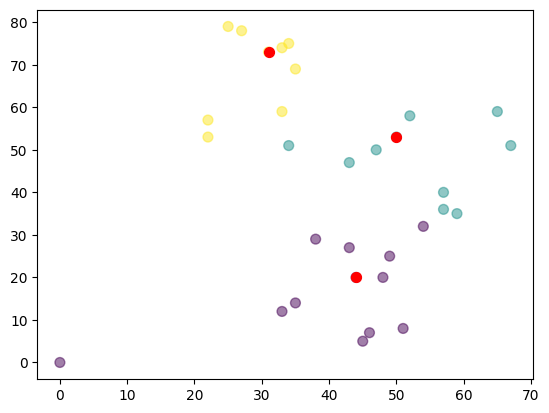




K-Means / k = 4 
centroids:
[[55.1 46.1]
 [43.2 16.7]
 [29.6 66.8]
 [ 0.   0. ]]


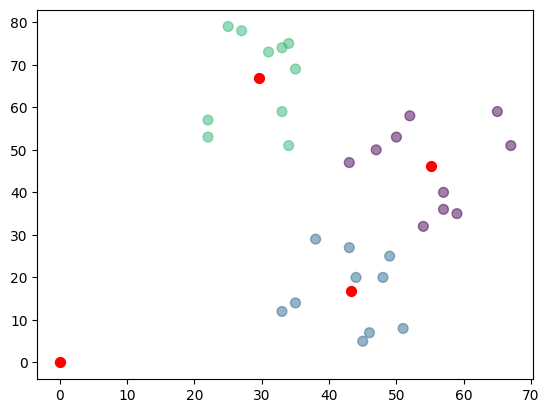




PAM / k = 4 
centroids:
[[44. 20.]
 [31. 73.]
 [57. 36.]
 [50. 53.]]


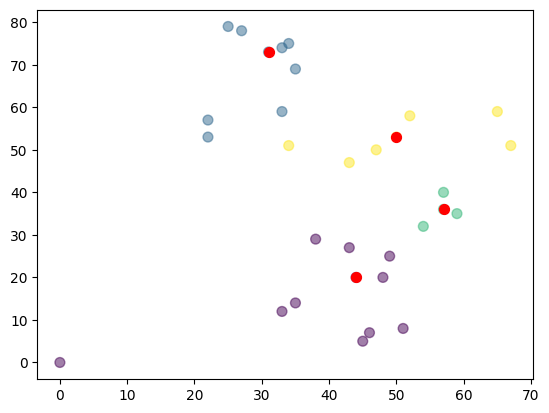

In [15]:
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# (0,0) is an outliar
Data = {'x': [0,25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [0,79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20, 5,29,27, 8, 7]
       }

df = DataFrame(Data,columns=['x','y'])

def display(clustering, centroids):
  plt.scatter(df['x'], df['y'], c=clustering.labels_.astype(float), s=50, alpha=0.5)
  plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
  plt.show()
  print('\n\n')

def kmeans_clustering(k):
  print("K-Means / k =", k, "\ncentroids:")
  kmeans = KMeans(n_clusters=k, n_init=10).fit(df)
  centroids = kmeans.cluster_centers_
  print(centroids)

  display(kmeans, centroids)

def PAM(k):
  print("PAM / k =", k, "\ncentroids:")
  pam = KMedoids(n_clusters=k, method='pam').fit(df)
  centroids = pam.cluster_centers_
  print(centroids)

  display(pam, centroids)

kmeans_clustering(3)
PAM(3)

kmeans_clustering(4)
PAM(4)